# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

     |████████████████████████████████| 508 kB 9.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 11.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

     |████████████████████████████████| 147 kB 14.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.4 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp31 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [13]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326623695088054272
1326623699097837574
1326623699223580683
1326623699718561794
1326623699794087944
1326623700440018947
1326623701027184642
1326623701475979264
1326623701891244032
1326623702021255174
1326623702377660416
1326623702524583936
1326623703447334912
1326623704072278022
1326623704625926147
1326623705343160320
1326623707612274688
1326623711777185796
1326623711802388481
1326623712205008898
1326623712653750272
1326623713593335810
1326623714113249280
1326623715027808263
1326623715581440003
1326623715589644288
1326623715900215298
1326623716650971139
1326623717141733376
1326623719419240451
1326623720232906753
1326623720459427840
1326623721390542851
1326623721289879552
1326623721558315008
1326623721583472647
1326623723059896320
1326623723248623616
1326623724704067586
1326623724850851842
1326623726369042433
1326623726528557060
1326623726067200001
1326623727489060866
1326623727698718721
1326623729221300226
1326623729514934272
1326623730555101184
1326623730781446144
1326623731221995520


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [14]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [15]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [16]:
search_results = rest_api.search.tweets( count=count,q=q) 
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 11 20:32:33 +0000 2020'
'Wed Nov 11 20:32:32 +0000 2020'
'Wed Nov 11 20:32:32 +0000 2020'
'Wed Nov 11 20:32:31 +0000 2020'
'Wed Nov 11 20:32:30 +0000 2020'
'Wed Nov 11 20:32:30 +0000 2020'
'Wed Nov 11 20:32:30 +0000 2020'
'Wed Nov 11 20:32:29 +0000 2020'
'Wed Nov 11 20:32:29 +0000 2020'
'Wed Nov 11 20:32:29 +0000 2020'
'Wed Nov 11 20:32:29 +0000 2020'
'Wed Nov 11 20:32:29 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:28 +0000 2020'
'Wed Nov 11 20:32:27 +0000 2020'
'Wed Nov 11 20:32:27 +0000 2020'
'Wed Nov 11 20:32:27 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 11 20:32:05 +0000 2020'
'Wed Nov 11 20:32:04 +0000 2020'
'Wed Nov 11 20:31:50 +0000 2020'
'Wed Nov 11 20:31:50 +0000 2020'
'Wed Nov 11 20:31:50 +0000 2020'
'Wed Nov 11 20:31:50 +0000 2020'
'Wed Nov 11 20:31:49 +0000 2020'
'Wed Nov 11 20:31:49 +0000 2020'
'Wed Nov 11 20:31:49 +0000 2020'
'Wed Nov 11 20:31:49 +0000 2020'
'Wed Nov 11 20:31:49 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:48 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:47 +0000 2020'
'Wed Nov 11 20:31:46 +0000 2020'
'Wed Nov 11 20:31:46 +0000 2020'
'Wed Nov 11 20:31:45 +0000 2020'
'Wed Nov 11 20:31:45 +0000 2020'
'Wed Nov 1

'Wed Nov 11 20:30:54 +0000 2020'
'Wed Nov 11 20:30:54 +0000 2020'
'Wed Nov 11 20:30:54 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:53 +0000 2020'
'Wed Nov 11 20:30:52 +0000 2020'
'Wed Nov 11 20:30:52 +0000 2020'
'Wed Nov 11 20:30:52 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:51 +0000 2020'
'Wed Nov 11 20:30:50 +0000 2020'
'Wed Nov 11 20:30:50 +0000 2020'
'Wed Nov 11 20:30:50 +0000 2020'
'Wed Nov 11 20:30:50 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 11 20:30:49 +0000 2020'
'Wed Nov 1

'Wed Nov 11 20:30:02 +0000 2020'
'Wed Nov 11 20:30:02 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:01 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 11 20:30:00 +0000 2020'
'Wed Nov 1

'Wed Nov 11 20:29:08 +0000 2020'
'Wed Nov 11 20:29:07 +0000 2020'
'Wed Nov 11 20:29:07 +0000 2020'
'Wed Nov 11 20:29:07 +0000 2020'
'Wed Nov 11 20:29:06 +0000 2020'
'Wed Nov 11 20:29:06 +0000 2020'
'Wed Nov 11 20:29:06 +0000 2020'
'Wed Nov 11 20:29:06 +0000 2020'
'Wed Nov 11 20:29:06 +0000 2020'
'Wed Nov 11 20:29:05 +0000 2020'
'Wed Nov 11 20:29:04 +0000 2020'
'Wed Nov 11 20:29:04 +0000 2020'
'Wed Nov 11 20:29:04 +0000 2020'
'Wed Nov 11 20:29:04 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:03 +0000 2020'
'Wed Nov 11 20:29:02 +0000 2020'
'Wed Nov 11 20:29:02 +0000 2020'
'Wed Nov 11 20:29:02 +0000 2020'
'Wed Nov 11 20:29:02 +0000 2020'
'Wed Nov 11 20:29:01 +0000 2020'
'Wed Nov 11 20:29:01 +0000 2020'
'Wed Nov 11 20:29:01 +0000 2020'
'Wed Nov 11 20:29:00 +0000 2020'
'Wed Nov 11 20:29:00 +0000 2020'
'Wed Nov 11 20:29:00 +0000 2020'
'Wed Nov 1

'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:56 +0000 2020'
'Wed Nov 11 20:27:55 +0000 2020'
'Wed Nov 11 20:27:55 +0000 2020'
'Wed Nov 11 20:27:54 +0000 2020'
'Wed Nov 11 20:27:54 +0000 2020'
'Wed Nov 11 20:27:54 +0000 2020'
'Wed Nov 11 20:27:54 +0000 2020'
'Wed Nov 11 20:27:53 +0000 2020'
'Wed Nov 11 20:27:53 +0000 2020'
'Wed Nov 11 20:27:52 +0000 2020'
'Wed Nov 11 20:27:52 +0000 2020'
'Wed Nov 11 20:27:52 +0000 2020'
'Wed Nov 11 20:27:52 +0000 2020'
'Wed Nov 11 20:27:51 +0000 2020'
'Wed Nov 11 20:27:51 +0000 2020'
'Wed Nov 11 20:27:51 +0000 2020'
'Wed Nov 11 20:27:51 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:50 +0000 2020'
'Wed Nov 11 20:27:49 +0000 2020'
'Wed Nov 1

'Wed Nov 11 20:26:56 +0000 2020'
'Wed Nov 11 20:26:56 +0000 2020'
'Wed Nov 11 20:26:56 +0000 2020'
'Wed Nov 11 20:26:55 +0000 2020'
'Wed Nov 11 20:26:55 +0000 2020'
'Wed Nov 11 20:26:55 +0000 2020'
'Wed Nov 11 20:26:55 +0000 2020'
'Wed Nov 11 20:26:55 +0000 2020'
'Wed Nov 11 20:26:54 +0000 2020'
'Wed Nov 11 20:26:54 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:53 +0000 2020'
'Wed Nov 11 20:26:52 +0000 2020'
'Wed Nov 11 20:26:52 +0000 2020'
'Wed Nov 11 20:26:51 +0000 2020'
'Wed Nov 11 20:26:51 +0000 2020'
'Wed Nov 11 20:26:51 +0000 2020'
'Wed Nov 11 20:26:51 +0000 2020'
'Wed Nov 11 20:26:51 +0000 2020'
'Wed Nov 11 20:26:50 +0000 2020'
'Wed Nov 11 20:26:50 +0000 2020'
'Wed Nov 11 20:26:50 +0000 2020'
'Wed Nov 11 20:26:49 +0000 2020'
'Wed Nov 11 20:26:49 +0000 2020'
'Wed Nov 11 20:26:49 +0000 2020'
'Wed Nov 11 20:26:49 +0000 2020'
'Wed Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1647
1512


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [21]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')

        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Ishdeep Kohli
text: #UNAIDS Congratulates
President-elect @JoeBiden
Vice President-elect
@KamalaHarris on their election
@UNAIDS looks… https://t.co/jLOWbtnVSe
----
name: Chad Cooper
text: RT @wateronmars33: #COVID19 #politics #elections
----
name: ✨Water🌊On🌊Mars ✨
text: #COVID19 #politics #elections https://t.co/LlvIMba9ma
----
name: the bot formerly known as layoff
text: In the last half hour, 2467 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: Cadey “Be A Patriot, Wear A Mask” Harrel, MD
text: RT @drcarroll: We're starting to run up to 20% positivity in Arizona again.

Do we need to wait until all of our Election results are back…
----
name: Alan W. Silberberg
text: RT @IdeaGov: #elections are over. 
No Blue States, No Red States, Just United States. 
We are fighting a war against an invisible + truly n…
----
name: Hope E Ransom (HopeERinFL)
text: RT @IdeaGov: #elections are over. 
No Blue States, No Red States, Just United States. 
We are fightin

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,quote_count,reply_count,filter_level,timestamp_ms
0,5fac4a6e25013f7bced1dfa4,Wed Nov 11 20:29:36 +0000 2020,1326623129737814019,1326623129737814019,#UNAIDS Congratulates\nPresident-elect @JoeBid...,True,"{'hashtags': [{'text': 'UNAIDS', 'indices': [0...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fac4a6825013f7bced1dd24,Wed Nov 11 20:31:40 +0000 2020,1326623648887803904,1326623648887803904,RT @wateronmars33: #COVID19 #politics #elections,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,{'created_at': 'Wed Nov 11 20:29:23 +0000 2020...,1.326611e+18,1326610658561986560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fac4a6f25013f7bced1dfd8,Wed Nov 11 20:29:23 +0000 2020,1326623075643879431,1326623075643879431,#COVID19 #politics #elections https://t.co/Llv...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,1.326611e+18,1326610658561986560,{'created_at': 'Wed Nov 11 19:40:02 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,5fac4a6925013f7bced1dd99,Wed Nov 11 20:31:17 +0000 2020,1326623553899253761,1326623553899253761,"In the last half hour, 2467 people tweeted abo...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fac4a7425013f7bced1e222,Wed Nov 11 20:26:58 +0000 2020,1326622468816076800,1326622468816076800,RT @drcarroll: We're starting to run up to 20%...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,{'created_at': 'Wed Nov 11 16:11:06 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fac4a7325013f7bced1e17d,Wed Nov 11 20:27:36 +0000 2020,1326622627746603008,1326622627746603008,RT @IdeaGov: #elections are over. \nNo Blue St...,False,"{'hashtags': [{'text': 'elections', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Sun Nov 08 22:00:01 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fac4a6a25013f7bced1de2a,Wed Nov 11 20:30:47 +0000 2020,1326623428737191938,1326623428737191938,RT @IdeaGov: #elections are over. \nNo Blue St...,False,"{'hashtags': [{'text': 'elections', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Sun Nov 08 22:00:01 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fac4a7525013f7bced1e247,Wed Nov 11 20:26:50 +0000 2020,1326622436255789057,1326622436255789057,@FortuneMagazine Congratulations to president ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.321917e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fac4a6d25013f7bced1df60,Wed Nov 11 20:29:52 +0000 2020,1326623198926966784,1326623198926966784,RT @murray_nyc: @realDonaldTrump I guess someo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,{'created_at': 'Wed Nov 11 15:13:42 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fac4a6b25013f7bced1dea3,Wed Nov 11 20:30:22 +0000 2020,1326623324609400834,1326623324609400834,RT @sunrisemvmt: Biden &amp; Harris were elect...,False,"{'hashtags': [{'t

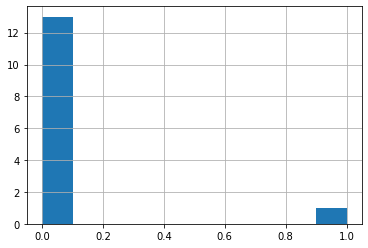

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count